<a href="https://colab.research.google.com/github/HARSHITAMOGHA001/Kavach-Daksh/blob/main/UrldetectML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [ ]:
data = pd.read_csv('urlset.csv', encoding='latin1', error_bad_lines=False)

<ipython-input-2-8383d80b5ec4>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('urlset.csv', encoding='latin1', error_bad_lines=False)
Skipping line 18259: expected 14 fields, saw 15
Skipping line 18273: expected 14 fields, saw 15

<ipython-input-2-8383d80b5ec4>:1: DtypeWarning: Columns (1,2,3,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('urlset.csv', encoding='latin1', error_bad_lines=False)


In [ ]:
data.head(10)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0,0.748971,1.0
5,smilesvoegol.servebbs.org/voegol.php,10000000,0.0,0.0,2.0,223.500000,234.000000,0.0,0.0,0.0,0.0,0,0.852227,1.0
6,premierpaymentprocessing.com/includes/boleto-2...,10000000,0.0,0.0,4.0,119.000000,121.500000,0.0,0.0,0.0,0.0,0,0.853565,1.0
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,10000000,0.0,0.0,4.0,160.500000,157.250000,0.0,0.0,0.0,0.0,0,0.777622,1.0
8,super1000.info/docs,10000000,0.0,0.0,1.0,21.000000,13.000000,0.0,0.0,0.0,0.0,0,0.36,1.0
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,10000000,0.0,0.0,16.0,142.375000,142.500000,0.0,0.0,0.0,0.0,0,0.803006,1.0


In [ ]:
data.shape

(96005, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96005 entries, 0 to 96004
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         96005 non-null  object 
 1   ranking        95953 non-null  object 
 2   mld_res        95935 non-null  object 
 3   mld.ps_res     95924 non-null  object 
 4   card_rem       95923 non-null  float64
 5   ratio_Rrem     95923 non-null  float64
 6   ratio_Arem     95923 non-null  float64
 7   jaccard_RR     95922 non-null  float64
 8   jaccard_RA     95921 non-null  float64
 9   jaccard_AR     95920 non-null  float64
 10  jaccard_AA     95919 non-null  float64
 11  jaccard_ARrd   95919 non-null  object 
 12  jaccard_ARrem  95917 non-null  object 
 13  label          95913 non-null  float64
dtypes: float64(8), object(6)
memory usage: 10.3+ MB


In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95913 entries, 0 to 96004
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         95913 non-null  object 
 1   ranking        95913 non-null  object 
 2   mld_res        95913 non-null  object 
 3   mld.ps_res     95913 non-null  object 
 4   card_rem       95913 non-null  float64
 5   ratio_Rrem     95913 non-null  float64
 6   ratio_Arem     95913 non-null  float64
 7   jaccard_RR     95913 non-null  float64
 8   jaccard_RA     95913 non-null  float64
 9   jaccard_AR     95913 non-null  float64
 10  jaccard_AA     95913 non-null  float64
 11  jaccard_ARrd   95913 non-null  object 
 12  jaccard_ARrem  95913 non-null  object 
 13  label          95913 non-null  float64
dtypes: float64(8), object(6)
memory usage: 11.0+ MB


In [ ]:
X = data.drop(columns=['label'])
y = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

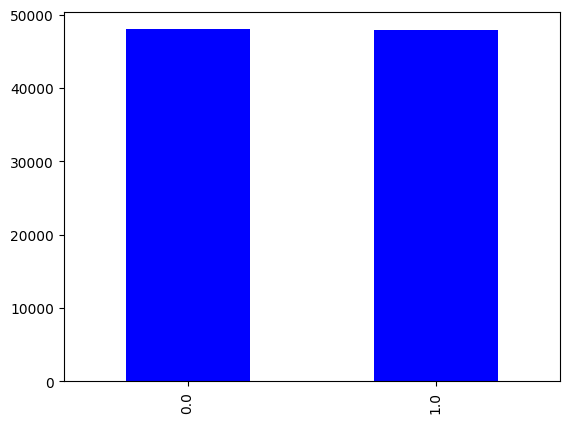

In [ ]:
data['label'].value_counts().plot.bar(color='blue')

In [ ]:
urls = data['domain'].tolist()
labels = data['label'].values

In [ ]:
train_data, test_data = data['domain'], data['label']

In [ ]:
print(type(train_data))
print(next(iter(train_data)))

<class 'pandas.core.series.Series'>
nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526


In [ ]:
training_sentences = []
training_labels = []

for s in train_data:
    training_sentences.append(str(s))
    train_data = data['domain']
labels = data['label']
training_sentences = train_data.values.tolist()
training_labels = labels.values.tolist()

testing_sentences = []
testing_labels = []

for s in test_data:
    testing_sentences.append(str(s))
    test_data = data['domain']
labels = data['label']
testing_sentences = test_data.values.tolist()
testing_labels = labels.values.tolist()

In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim=16
max_length = 120
trunc_type= 'post'
oov_tok=""

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [ ]:
print(word_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating = trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161,909
Trainable params: 161,909
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs=30
history=model.fit(padded, training_labels_final, epochs=num_epochs, validation_data = (testing_padded, testing_labels_final))

Epoch 1/30
2998/2998 [==============================] - 141s 46ms/step - loss: 0.1119 - accuracy: 0.9564 - val_loss: 0.0484 - val_accuracy: 0.9837
Epoch 2/30
2998/2998 [==============================] - 141s 47ms/step - loss: 0.0498 - accuracy: 0.9822 - val_loss: 0.0371 - val_accuracy: 0.9879
Epoch 3/30
2998/2998 [==============================] - 139s 46ms/step - loss: 0.0425 - accuracy: 0.9848 - val_loss: 0.0336 - val_accuracy: 0.9879
Epoch 4/30
2998/2998 [==============================] - 119s 40ms/step - loss: 0.0381 - accuracy: 0.9864 - val_loss: 0.0286 - val_accuracy: 0.9903
Epoch 5/30
2998/2998 [==============================] - 119s 40ms/step - loss: 0.0340 - accuracy: 0.9877 - val_loss: 0.0264 - val_accuracy: 0.9914
Epoch 6/30
2998/2998 [==============================] - 120s 40ms/step - loss: 0.0320 - accuracy: 0.9889 - val_loss: 0.0258 - val_accuracy: 0.9911
Epoch 7/30
2998/2998 [==============================] - 144s 48ms/step - loss: 0.0387 - accuracy: 0.9866 - val_loss: 0

In [ ]:
final_training_accuracy = history.history['accuracy'][-1]
final_testing_accuracy = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_training_accuracy:.4f}")
print(f"Final Testing Accuracy: {final_testing_accuracy:.4f}")

Final Training Accuracy: 0.9925
Final Testing Accuracy: 0.9931


In [ ]:
pip install tensorflow-federated

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.4/114.4 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.5/558.5 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.2/365.2 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 53.9 MB/s eta 0: